In [9]:
import sys
import os
import pandas as pd
from tabulate import tabulate

In [10]:
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../scripts'))

In [6]:
from telecom_network_user_experience import aggregate_per_customer, top_bottom_most_frequent, compute_distributions, kmeans_clustering

In [7]:
from data_preparation import load_data
load_data = load_data('xdr_data')
data = load_data

Connection successful


AttributeError: 'Engine' object has no attribute 'close'

Aggregating per customer

In [10]:
agg_data = aggregate_per_customer(data)
print(tabulate(agg_data.head(), headers='keys', tablefmt='pretty', showindex=False))

+-------------------+----------------------------------+-----------------------------+-----------------------------+--------------------+--------------------+-------------------------+-------------------------+------------------------+--------------------+----------------+
|       IMSI        |           Handset Type           | TCP DL Retrans. Vol (Bytes) | TCP UL Retrans. Vol (Bytes) |  Avg RTT DL (ms)   |  Avg RTT UL (ms)   | Avg Bearer TP DL (kbps) | Avg Bearer TP UL (kbps) | Avg TCP Retransmission |      Avg RTT       | Avg Throughput |
+-------------------+----------------------------------+-----------------------------+-----------------------------+--------------------+--------------------+-------------------------+-------------------------+------------------------+--------------------+----------------+
| 204047108489451.0 | Quectel Wireless. Quectel Ec21-E |      20809914.27034193      |      759658.6648110661      | 109.79570605376027 | 17.662882910900326 |           2.0      

Top, Bottom, and Most Frequent Values

In [21]:

tcp_top, tcp_bottom, tcp_most_freq = top_bottom_most_frequent(agg_data, 'Avg TCP Retransmission')
rtt_top, rtt_bottom, rtt_most_freq = top_bottom_most_frequent(agg_data, 'Avg RTT')
throughput_top, throughput_bottom, throughput_most_freq = top_bottom_most_frequent(agg_data, 'Avg Throughput')

In [37]:


def print_table(data, title):
    """ Print data in table format with title """
    print(title)
    print(tabulate(data, headers='keys', tablefmt='pretty'))

tcp_top_df = tcp_top.reset_index(name='Avg TCP Retransmission').rename(columns={'index': 'Index'})
tcp_bottom_df = tcp_bottom.reset_index(name='Avg TCP Retransmission').rename(columns={'index': 'Index'})
tcp_most_freq_df = tcp_most_freq.reset_index(name='Frequency').rename(columns={'index': 'Avg TCP Retransmission'})

print_table(tcp_top_df, "Top 10 values for Avg TCP Retransmission")
print_table(tcp_bottom_df, "Bottom 10 values for Avg TCP Retransmission")
print_table(tcp_most_freq_df, "Most Frequent values for Avg TCP Retransmission")


Top 10 values for Avg TCP Retransmission
+---+---------+------------------------+
|   |  Index  | Avg TCP Retransmission |
+---+---------+------------------------+
| 0 | 76097.0 |      2150738719.5      |
| 1 | 70102.0 |      2144060430.0      |
| 2 | 25609.0 |      2134323675.0      |
| 3 | 27763.0 |      2127329821.5      |
| 4 | 82407.0 |      2105628909.5      |
| 5 | 66333.0 |      2083297486.5      |
| 6 | 31006.0 |      2068968868.5      |
| 7 | 81329.0 |      2058902486.5      |
| 8 | 76794.0 |      1984060298.0      |
| 9 | 97873.0 |      1893435466.5      |
+---+---------+------------------------+
Bottom 10 values for Avg TCP Retransmission
+---+----------+------------------------+
|   |  Index   | Avg TCP Retransmission |
+---+----------+------------------------+
| 0 | 29704.0  |          48.5          |
| 1 |  6407.0  |          64.0          |
| 2 | 107032.0 |          64.5          |
| 3 | 56006.0  |          67.0          |
| 4 | 60470.0  |          71.5          |
| 5 |

In [38]:


def print_table(data, title):
    """ Print data in table format with title """
    print(title)
    print(tabulate(data, headers='keys', tablefmt='pretty'))

# Convert the Series to a DataFrame for better formatting
rtt_top_df = rtt_top.reset_index(name='Avg RTT').rename(columns={'index': 'Index'})
rtt_bottom_df = rtt_bottom.reset_index(name='Avg RTT').rename(columns={'index': 'Index'})
rtt_most_freq_df = rtt_most_freq.reset_index(name='Frequency').rename(columns={'index': 'Avg RTT'})

# Print tables
print_table(rtt_top_df, "Top 10 values for Avg RTT")
print_table(rtt_bottom_df, "Bottom 10 values for Avg RTT")
print_table(rtt_most_freq_df, "Most Frequent values for Avg RTT")


Top 10 values for Avg RTT
+---+---------+----------+
|   |  Index  | Avg RTT  |
+---+---------+----------+
| 0 | 60040.0 | 48462.0  |
| 1 | 97645.0 | 27424.0  |
| 2 | 59328.0 | 16167.5  |
| 3 | 40883.0 | 13639.0  |
| 4 | 26712.0 | 13150.0  |
| 5 | 7172.0  | 12857.5  |
| 6 | 6342.0  | 12694.0  |
| 7 | 11680.0 | 12369.0  |
| 8 | 66142.0 | 11505.25 |
| 9 | 91837.0 | 10490.0  |
+---+---------+----------+
Bottom 10 values for Avg RTT
+---+---------+---------+
|   |  Index  | Avg RTT |
+---+---------+---------+
| 0 | 4705.0  |   0.0   |
| 1 | 75247.0 |   0.0   |
| 2 | 73884.0 |   1.0   |
| 3 | 36676.0 |   2.0   |
| 4 | 13477.0 |   2.5   |
| 5 | 70980.0 |   3.0   |
| 6 | 90088.0 |   4.0   |
| 7 | 1368.0  |   4.5   |
| 8 | 48345.0 |   4.5   |
| 9 | 12935.0 |   5.0   |
+---+---------+---------+
Most Frequent values for Avg RTT
+---+--------------------+-----------+
|   |      Avg RTT       | Frequency |
+---+--------------------+-----------+
| 0 | 63.729294482330296 |  18533.0  |
| 1 |        1

In [39]:


def print_table(data, title):
    """ Print data in table format with title """
    print(title)
    print(tabulate(data, headers='keys', tablefmt='pretty'))

# Convert the Series to a DataFrame for better formatting
throughput_top_df = throughput_top.reset_index(name='Avg Throughput').rename(columns={'index': 'Index'})
throughput_bottom_df = throughput_bottom.reset_index(name='Avg Throughput').rename(columns={'index': 'Index'})
throughput_most_freq_df = throughput_most_freq.reset_index(name='Frequency').rename(columns={'index': 'Avg Throughput'})

# Print tables
print_table(throughput_top_df, "Top 10 values for Avg Throughput")
print_table(throughput_bottom_df, "Bottom 10 values for Avg Throughput")
print_table(throughput_most_freq_df, "Most Frequent values for Avg Throughput")


Top 10 values for Avg Throughput
+---+----------+----------------+
|   |  Index   | Avg Throughput |
+---+----------+----------------+
| 0 | 99478.0  |    141965.5    |
| 1 | 78738.0  |    132862.0    |
| 2 | 82276.0  |   132588.25    |
| 3 | 30924.0  |    127475.0    |
| 4 | 100798.0 |    119491.0    |
| 5 | 97572.0  |    117682.5    |
| 6 | 81134.0  |    115491.0    |
| 7 | 44666.0  |    114151.5    |
| 8 | 82539.0  |    113667.0    |
| 9 | 50623.0  |    113252.5    |
+---+----------+----------------+
Bottom 10 values for Avg Throughput
+---+--------+----------------+
|   | Index  | Avg Throughput |
+---+--------+----------------+
| 0 | 759.0  |      0.0       |
| 1 | 1256.0 |      0.0       |
| 2 | 2184.0 |      0.0       |
| 3 | 2437.0 |      0.0       |
| 4 | 3155.0 |      0.0       |
| 5 | 4918.0 |      0.0       |
| 6 | 5943.0 |      0.0       |
| 7 | 5973.0 |      0.0       |
| 8 | 7596.0 |      0.0       |
| 9 | 7948.0 |      0.0       |
+---+--------+----------------+
Most Fr

Distribution and Average

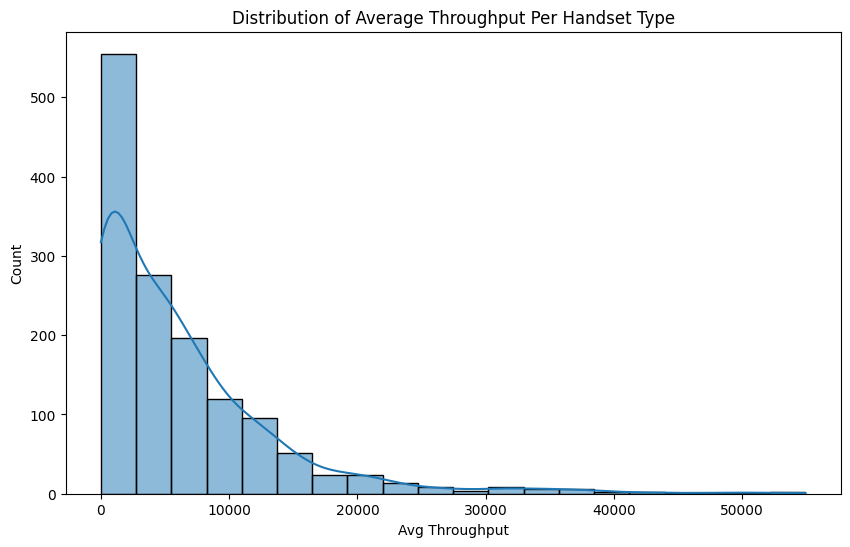

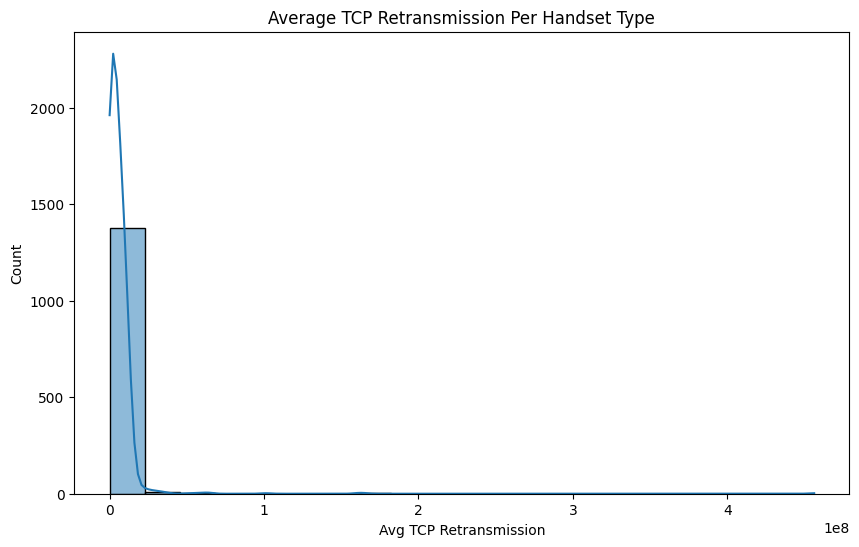

Index(['IMSI', 'Handset Type', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'Avg TCP Retransmission', 'Avg RTT', 'Avg Throughput'],
      dtype='object')


In [11]:
throughput_dist, tcp_dist = compute_distributions(agg_data)
print(agg_data.columns)


K-Means Clustering

In [13]:
agg_data, cluster_descriptions = kmeans_clustering(agg_data)


for description in cluster_descriptions:
    
    print(description)

c:\Users\teeyob\Telco_Investment_Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0: Avg TCP Retransmission: 8423079.74, Avg RTT: 70.67 ms, Avg Throughput: 2164.61 kbps
Cluster 1: Avg TCP Retransmission: 10077716.78, Avg RTT: 51.34 ms, Avg Throughput: 27525.32 kbps
Cluster 2: Avg TCP Retransmission: 1096150358.41, Avg RTT: 71.81 ms, Avg Throughput: 35863.16 kbps
